                     sess_id  seqnum   tradedate tradetime ticker clgroup  \
date                                                                        
2020-05-08 10:02:14     6035      66  2020-05-08  10:02:14     Si     FIZ   
2020-05-08 10:06:45     6035      67  2020-05-08  10:06:45     Si     FIZ   
2020-05-08 10:13:20     6035      68  2020-05-08  10:13:20     Si     FIZ   
2020-05-08 10:17:45     6035      69  2020-05-08  10:17:45     Si     FIZ   
2020-05-08 10:22:00     6035      70  2020-05-08  10:22:00     Si     FIZ   
...                      ...     ...         ...       ...    ...     ...   
2023-11-13 14:35:00     6926     124  2023-11-13  14:35:00     Si     FIZ   
2023-11-13 14:40:00     6926     125  2023-11-13  14:40:00     Si     FIZ   
2023-11-13 14:45:00     6926     126  2023-11-13  14:45:00     Si     FIZ   
2023-11-13 14:50:00     6926     127  2023-11-13  14:50:00     Si     FIZ   
2023-11-13 14:55:00     6926     128  2023-11-13  14:55:00     Si     FIZ   

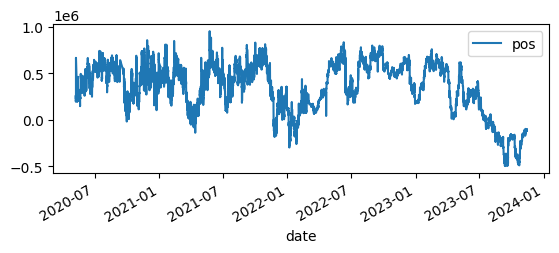

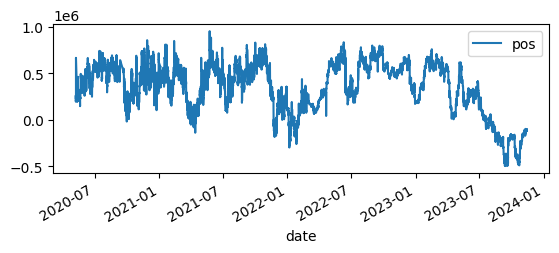

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

net_df = pd.read_csv("si_full_date.csv")
net_df['date'] = pd.to_datetime(net_df['tradedate'].astype(str) + ' ' + net_df['tradetime'].astype(str))

# net_df = pd.read_csv("si_full_date.csv", parse_dates={'datetime': ['tradedate', 'tradetime']})
net_df.set_index('date', inplace=True)

# Now net_df has the combined datetime as the index
net_df.head(3)

# Now df has unique columns
net_df = net_df.loc[net_df['clgroup'] == 'FIZ']
net_df['date'] = pd.to_datetime(net_df['tradedate'].astype(str) + ' ' + net_df['tradetime'].astype(str))
net_df[["pos"]].plot(subplots=True, layout=(2,1));

# Assuming df is your DataFrame
net_df = net_df.drop_duplicates(subset=['date'], keep='first')

net_df[["pos"]].plot(subplots=True, layout=(2,1));

print(net_df)

net_df.to_csv("output_file.csv", index=False)


                        pos_traj_1     pos_traj_2     pos_traj_3  \
date                                                               
2020-05-08 10:02:14  232844.920944  218678.283629  234810.696153   
2020-05-08 10:06:45  240370.518800  230256.562091  242115.405940   
2020-05-08 10:13:20  230425.547330  237023.931613  232755.819513   
2020-05-08 10:17:45  223889.071646  244991.391174  230342.350342   
2020-05-08 10:22:00  233055.843519  256007.145132  233619.626015   

                        pos_traj_4     pos_traj_5     pos_traj_6  \
date                                                               
2020-05-08 10:02:14  227288.654956  223842.845568  214129.435843   
2020-05-08 10:06:45  226336.279702  222289.318911  215257.221088   
2020-05-08 10:13:20  239594.384347  232245.911147  187015.436472   
2020-05-08 10:17:45  240487.379355  240324.847182  197093.960349   
2020-05-08 10:22:00  235029.121031  226895.740297  186787.380636   

                        pos_traj_7     pos_tra

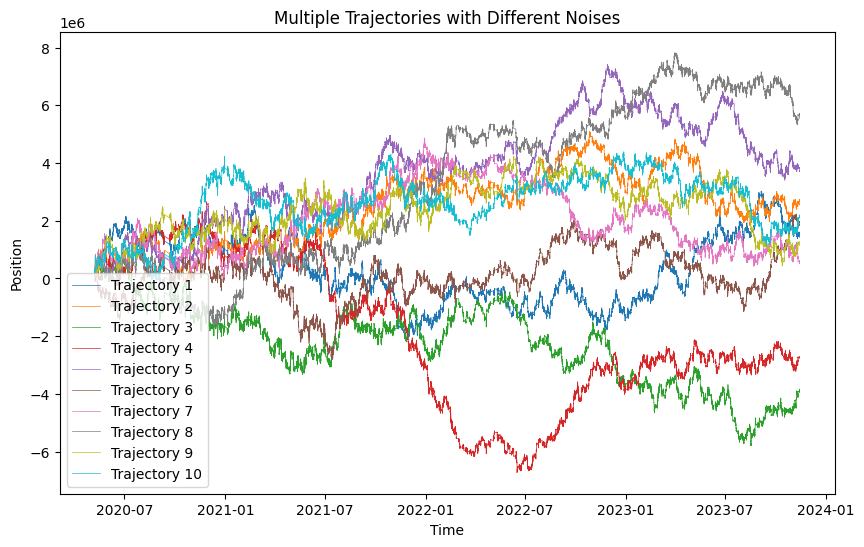

In [25]:
n_points = len(net_df["pos"])
n_trajectories = 10  # Количество траекторий

# Создаем датафрейм с временем
df_trajectories = pd.DataFrame(index=net_df['date'])

# Создаем несколько траекторий с разными шумами
for i in range(n_trajectories):
    noise = np.random.normal(0, 10**4, n_points)
    df_trajectories[f'pos_traj_{i+1}'] = net_df["pos"].values + np.cumsum(noise)

# Выводим первые несколько строк датафрейма
print(df_trajectories.head())

# Визуализируем траектории
plt.figure(figsize=(10, 6))
for i in range(n_trajectories):
    plt.plot(df_trajectories.index, df_trajectories[f'pos_traj_{i+1}'], label=f'Trajectory {i+1}', linewidth=0.5)

plt.title('Multiple Trajectories with Different Noises')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()